# **Investigate Hotel Business using Data Visualization**

In [ ]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **Data Preprocessing**

### Mengatasi data null (Hint: Perhatikan jumlah data null dan tipe dari setiap kolom, untuk memilih metode yang tepat.)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [ ]:
# null column percentage
print(round(100*(df.isnull().sum()/len(df.index)),3))

hotel                              0.000
is_canceled                        0.000
lead_time                          0.000
arrival_date_year                  0.000
arrival_date_month                 0.000
arrival_date_week_number           0.000
arrival_date_day_of_month          0.000
stays_in_weekend_nights            0.000
stays_in_weekdays_nights           0.000
adults                             0.000
children                           0.003
babies                             0.000
meal                               0.000
city                               0.409
market_segment                     0.000
distribution_channel               0.000
is_repeated_guest                  0.000
previous_cancellations             0.000
previous_bookings_not_canceled     0.000
booking_changes                    0.000
deposit_type                       0.000
agent                             13.686
company                           94.307
days_in_waiting_list               0.000
customer_type   

In [ ]:
# kolom null : children, city, agent, company
# handle null
new_df = df.copy()
new_df ['children'] = df['children'].fillna(0)
new_df ['city'] = new_df['city'].fillna('Undefined')
new_df ['agent'] = df['agent'].fillna(0)
new_df ['company'] = df['company'].fillna(0)

In [ ]:
# check null values
new_df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
# handle data type
new_df[['children','city','agent','company','adr']].dtypes

children    float64
city         object
agent       float64
company     float64
adr         float64
dtype: object

In [ ]:
# mengubah tipe data kolom
new_df['children'] = new_df['children'].astype(int)
new_df['agent'] = new_df['agent'].astype(int)
new_df['company'] = new_df['company'].astype(int)
new_df['adr'] = new_df['adr'].astype(int)

In [ ]:
# check data type
new_df[['children','city','agent','company','adr']].dtypes

children     int32
city        object
agent        int32
company      int32
adr          int32
dtype: object

### Mengganti value yang tidak sesuai (Hint: Perhatikan kolom "meal")

In [ ]:
new_df.describe(exclude=np.number)

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
# mencari data unik dalam kolom 'meal'
uniq_data = new_df['meal'].unique()
print("Data unik dalam kolom 'meal':")
print(uniq_data)

Data unik dalam kolom 'meal':
['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


In [ ]:
cat_freq = new_df['meal'].value_counts()
print("Jumlah muncul setiap kategori dalam kolom 'meal':")
print(cat_freq)

Jumlah muncul setiap kategori dalam kolom 'meal':
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64


In [ ]:
# mengganti 'Undefined' pada kolom 'meal' menjadi 'No Meal'
new_df['meal'] = new_df['meal'].replace(['Undefined'], 'No Meal')
new_df['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Membuang data yang tidak diperlukan (Hint: Perhatikan total jumlah tamu untuk setiap pemesanan)

In [ ]:
# Remove unnecessary data with 0 guest
# Create new column 'total_guests' from the combination of 'adults', 'children', 'babies' columns
new_df['total_guests'] = new_df['adults'] + new_df['children'] + new_df['babies']
print('Data with 0 guest:', new_df[new_df['total_guests'] == 0].shape[0], 'out of', new_df.shape[0], 'all data')

Data with 0 guest: 180 out of 119390 all data


In [ ]:
# Remove unnecessary data
ndf_clean = new_df.drop(new_df[new_df['total_guests'] == 0].index)

print('before pre-processing:', new_df.shape[0])
print('after pre-processing:', ndf_clean.shape[0])

before pre-processing: 119390
after pre-processing: 119210


In [ ]:
ndf_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2


In [ ]:
ndf_clean.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,...,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2018.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,...,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.764542,0.062553,0.571504,1.971210
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,...,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.421738,0.245360,0.792876,0.718876
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,1.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.000000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.000000,0.000000,0.000000,2.000000
75%,1.000000,161.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000


In [ ]:
ndf_clean.describe(include=['object'])

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119210,119210,119210,119210,119210,119210,119210,119210,119210
unique,2,12,4,178,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79163,13861,92236,48483,56408,97750,104461,89476,75011


In [ ]:
# terdapat anomali data pada adr, dimana adr terendah adalah -6.
# anomali data pada adr tidak dihapus, karena menarik untuk analisis lebih lanjut.

## **Monthly Hotel Booking Analysis Based on Hotel Type**

### Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)

In [ ]:
df2 = ndf_clean

In [ ]:
df2_agg = df2.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
df2_agg.columns = ['hotel_type', 'arrival_month', 'unique_year', 'num_booking'] # change the columns' name
df2_agg

,hotel_type,arrival_month,unique_year,num_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


### Melakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)

In [ ]:
df2_agg['avg_num_booking'] = round(df2_agg['num_booking']/df2_agg['unique_year'])
df2_agg

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


### Mengurutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)

In [ ]:
month1 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2_agg['month'] = df2_agg['arrival_month'].str[:3]
df2_agg['month'] = pd.Categorical(df2_agg['month'], categories=month1, ordered=True)
df2_agg

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking,month
0,City Hotel,April,2,4950,2475.0,Apr
1,City Hotel,August,2,7885,3942.0,Aug
2,City Hotel,December,2,7594,3797.0,Dec
3,City Hotel,February,2,4114,2057.0,Feb
4,City Hotel,January,2,4336,2168.0,Jan
5,City Hotel,July,2,8221,4110.0,Jul
6,City Hotel,June,2,7469,3734.0,Jun
7,City Hotel,March,2,3730,1865.0,Mar
8,City Hotel,May,2,6434,3217.0,May
9,City Hotel,November,2,7392,3696.0,Nov


In [ ]:
# membuat mapping urutan bulan
bulan_order = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# menggunakan mapping untuk mengurutkan kolom 'arrival_month'
df2_agg['arrival_month'] = df2_agg['arrival_month'].map(bulan_order)

# mengurutkan data frame berdasarkan kolom 'arrival_month'
df2_agg = df2_agg.sort_values(by='arrival_month')
df2_agg

,hotel_type,arrival_month,unique_year,num_booking,avg_num_booking,month
4,City Hotel,1,2,4336,2168.0,Jan
16,Resort Hotel,1,2,2435,1218.0,Jan
3,City Hotel,2,2,4114,2057.0,Feb
15,Resort Hotel,2,2,2645,1322.0,Feb
7,City Hotel,3,2,3730,1865.0,Mar
19,Resort Hotel,3,2,2191,1096.0,Mar
0,City Hotel,4,2,4950,2475.0,Apr
12,Resort Hotel,4,2,3102,1551.0,Apr
20,Resort Hotel,5,2,3334,1667.0,May
8,City Hotel,5,2,6434,3217.0,May


### Membuat plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

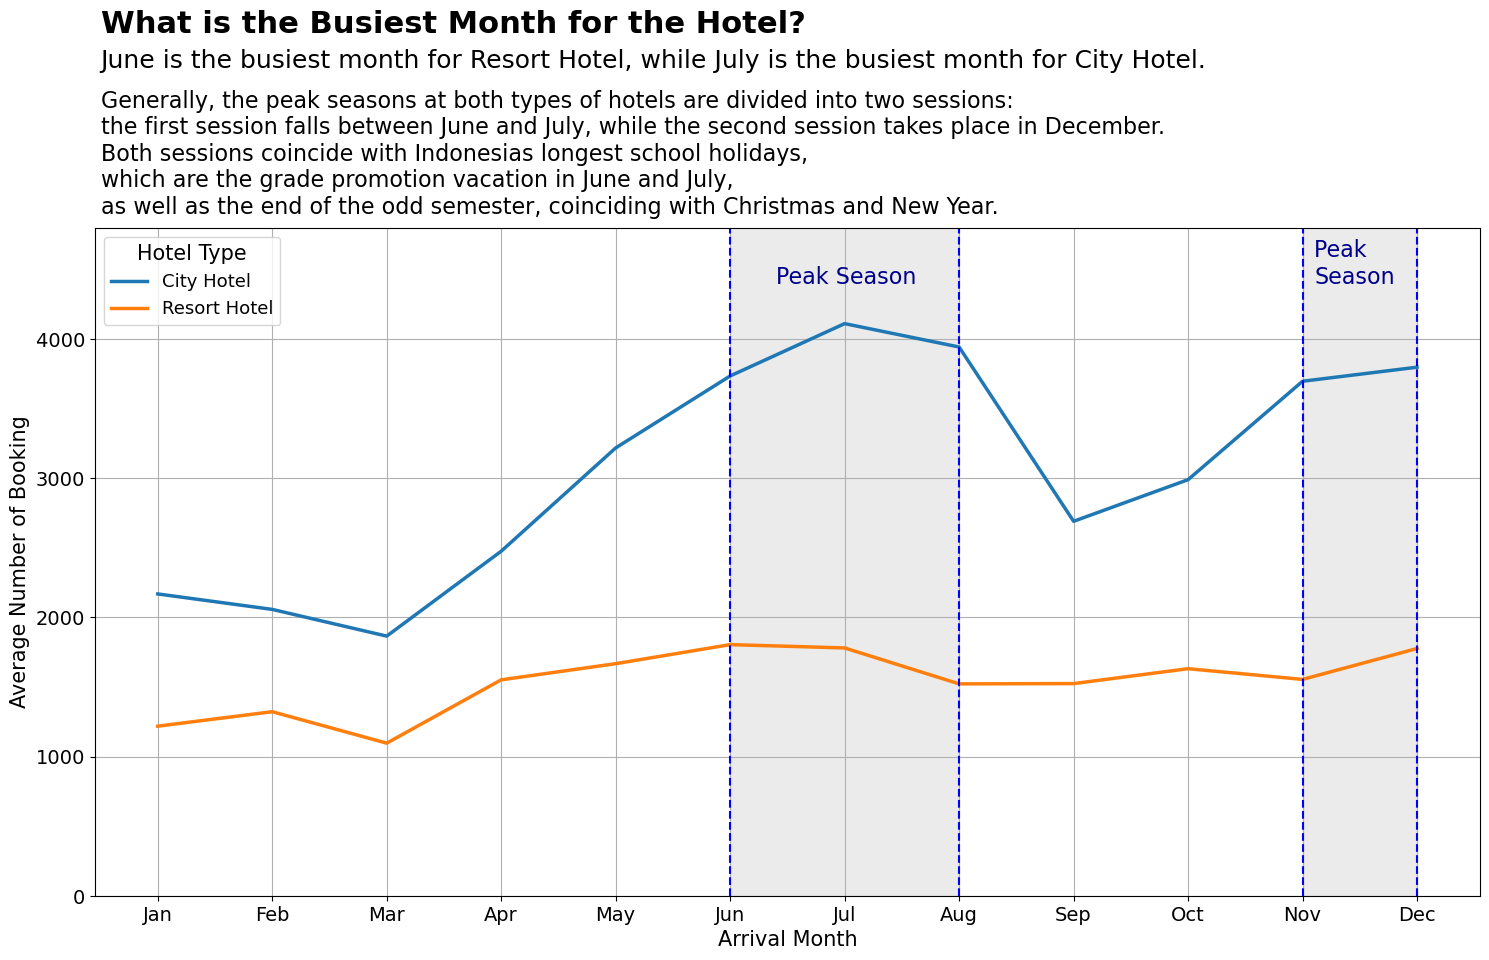

In [ ]:
# Visualising average monthly hotel booking for both hotels
plt.figure(figsize=(15,10))
sns.lineplot(x='month', y='avg_num_booking', hue='hotel_type', size="hotel_type", sizes=(2.5, 2.5), data=df2_agg)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid() # add gridline
plt.legend(title='Hotel Type', title_fontsize=15, prop={'size':13})
plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15)
plt.ylim(0, 4800)

plt.axvline(5, ls='--', color='blue')
plt.axvline(7, ls='--', color='blue')
plt.text(x=5.4, y=4400, s='Peak Season', fontsize=16, color='darkblue')
plt.stackplot(np.arange(5,8,1), [[5800]], color='silver', alpha=0.3)

plt.axvline(10, ls='--', color='blue')
plt.axvline(11, ls='--', color='blue')
plt.text(x=10.1, y=4400, s='Peak \nSeason', fontsize=16, color='darkblue')
plt.stackplot(np.arange(10,12,1), [[10800]], color='silver', alpha=0.3)

plt.text(x=-0.5, y=6200, s='What is the Busiest Month for the Hotel?', fontsize=22, fontweight='bold')
plt.text(x=-0.5, y=5950, s='June is the busiest month for Resort Hotel, while July is the busiest month for City Hotel.'
                            , fontsize=18)
plt.text(x=-0.5, y=4900, s='Generally, the peak seasons at both types of hotels are divided into two sessions:\nthe first session falls between June and July, while the second session takes place in December. \nBoth sessions coincide with Indonesias longest school holidays, \nwhich are the grade promotion vacation in June and July, \nas well as the end of the odd semester, coinciding with Christmas and New Year.',
         fontsize=16)


plt.tight_layout()
plt.savefig('average monthly booking', dpi=200)

### Interpretasi (Hint: Perhatikan hari libur di Indonesia)

Secara umum, sesi tersibuk di kedua jenis hotel ini dibagi menjadi dua sesi: sesi pertama berkisar pada bulan Juni hingga Juli, dan sesi kedua terjadi pada bulan Desember.
kedua sesi tersebut terjadi pada hari libur sekolah terpanjang di indonesia yaitu libur kenaikan kelas pada bulan juni dan juli serta libur akhir semester ganjil sekaligus natal dan tahun baru.

## **Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

### Membuat kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)

In [ ]:
ndf3 = ndf_clean

In [ ]:
ndf3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0,0,0,Personal,0,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,No Deposit,394,0,0,Personal,96,0,0,Check-Out,2
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,No Deposit,9,0,0,Personal,225,0,2,Check-Out,3
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,No Deposit,9,0,0,Personal,157,0,4,Check-Out,2
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,No Deposit,89,0,0,Personal,104,0,0,Check-Out,2


In [ ]:
ndf3 ['stay_duration'] = ndf3['stays_in_weekend_nights'] + ndf3['stays_in_weekdays_nights']
ndf3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,0,Personal,0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,0,Personal,0,0,0,Check-Out,2,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98,0,1,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,394,0,0,Personal,96,0,0,Check-Out,2,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,9,0,0,Personal,225,0,2,Check-Out,3,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,9,0,0,Personal,157,0,4,Check-Out,2,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,89,0,0,Personal,104,0,0,Check-Out,2,7


### Mengelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)

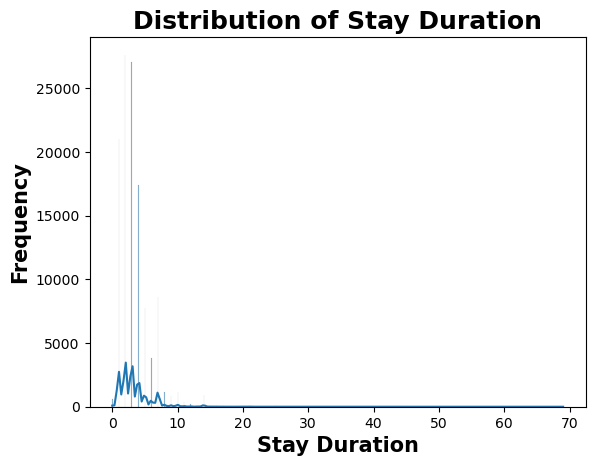

In [ ]:
sns.histplot(data=ndf3, x='stay_duration', kde=True)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Stay Duration', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')

# Memberikan label pada grafik batang
plt.title('Distribution of Stay Duration', fontsize=18, fontweight='bold')

plt.show()

<Axes: ylabel='stay_duration'>

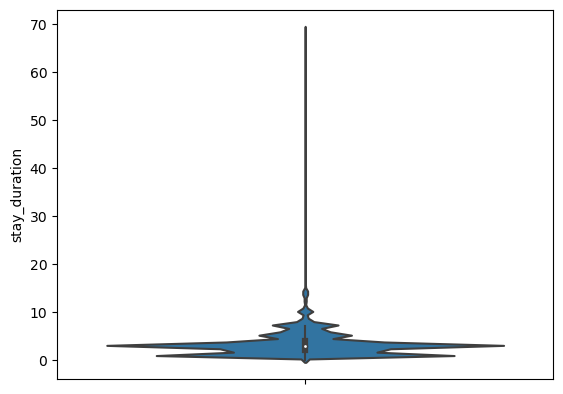

In [ ]:
sns.violinplot(data=ndf3, y='stay_duration')

In [ ]:
ndf3['stay_duration'].describe()

count    119210.000000
mean          3.426248
std           2.540692
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64

In [ ]:
# menghitung berapa kali nilai 0 muncul dalam kolom
count_of_zeros = (ndf3['stay_duration'] == 0).sum()
count_of_zeros

645

In [ ]:
# menghitung persentase baris yang berisi 0 pada kolom stay duration
total_count = len(ndf3['stay_duration'])
prcntg_zeros = (count_of_zeros/total_count)*100
prcntg_zeros

0.5410619914436708

In [ ]:
# menghitung berapa kali nilai lebih dari 5 muncul dalam kolom
count_of_69 = (ndf3['stay_duration'] >= 5).sum()
count_of_69

25491

In [ ]:
# menghapus baris stay duration yang berisi 0
# memutuskan menghapus data 0 karena yang ditanyakan adalah total durasi menginap dan baris 0 pada kolom tersebut kurang dari 10% data total
ndf3_segment = ndf3[~ndf3['stay_duration'].isin([0])]
ndf3_segment

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,...,0,0,0,Personal,107,0,0,Check-Out,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,394,0,0,Personal,96,0,0,Check-Out,2,7
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,9,0,0,Personal,225,0,2,Check-Out,3,7
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,9,0,0,Personal,157,0,4,Check-Out,2,7
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,89,0,0,Personal,104,0,0,Check-Out,2,7


In [ ]:
ndf3_segment['stay_duration'].describe()

count    118565.000000
mean          3.444887
std           2.534960
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stay_duration, dtype: float64

<Axes: ylabel='stay_duration'>

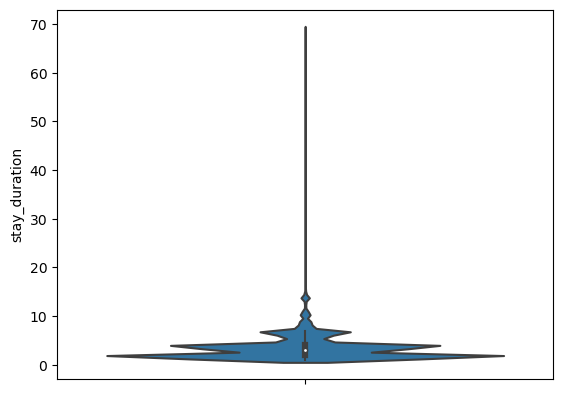

In [ ]:
sns.violinplot(data=ndf3_segment, y='stay_duration')

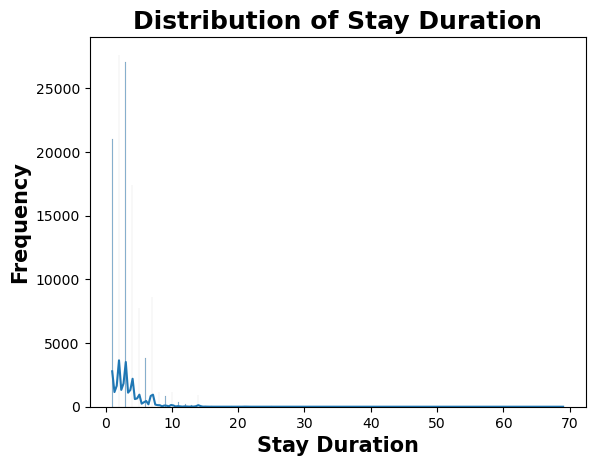

In [ ]:
sns.histplot(data=ndf3_segment, x='stay_duration', kde=True)

# Menambahkan label pada sumbu x dan y
plt.xlabel('Stay Duration', fontsize=15, fontweight='bold')
plt.ylabel('Frequency', fontsize=15, fontweight='bold')

# Memberikan label pada grafik batang
plt.title('Distribution of Stay Duration', fontsize=18, fontweight='bold')

plt.show()

In [ ]:
ndf3_segment['thresholds_stay_duration'] = np.where(ndf3_segment['stay_duration'] < 2, 'short_term',
                     np.where(ndf3_segment['stay_duration'] < 4, 'medium_term', 'long_term'))

C:\Users\Milla\AppData\Local\Temp\ipykernel_10584\1451621002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf3_segment['thresholds_stay_duration'] = np.where(ndf3_segment['stay_duration'] < 2, 'short_term',


In [ ]:
ndf3_segment['thresholds_stay_duration']

2          short_term
3          short_term
4         medium_term
5         medium_term
6         medium_term
             ...     
119385      long_term
119386      long_term
119387      long_term
119388      long_term
119389      long_term
Name: thresholds_stay_duration, Length: 118565, dtype: object

### Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

In [ ]:
df3_agg = ndf3_segment.groupby(['hotel', 'is_canceled', 'thresholds_stay_duration'])['arrival_date_month'].count().reset_index(name='num_bookings')
df3_pivot = df3_agg.pivot_table(index=['hotel', 'thresholds_stay_duration'], columns='is_canceled', values='num_bookings').reset_index()
df3_pivot

is_canceled,hotel,thresholds_stay_duration,0,1
0,City Hotel,long_term,13806,9049
1,City Hotel,medium_term,22872,19914
2,City Hotel,short_term,9155,4103
3,Resort Hotel,long_term,13661,6348
4,Resort Hotel,medium_term,8316,3594
5,Resort Hotel,short_term,6579,1168


### Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)

In [ ]:
df3_pivot['cancellation_rate'] = round(df3_pivot[1]*100.0/(df3_pivot[0]+df3_pivot[1]), 1)
df3_pivot

is_canceled,hotel,thresholds_stay_duration,0,1,cancellation_rate
0,City Hotel,long_term,13806,9049,39.6
1,City Hotel,medium_term,22872,19914,46.5
2,City Hotel,short_term,9155,4103,30.9
3,Resort Hotel,long_term,13661,6348,31.7
4,Resort Hotel,medium_term,8316,3594,30.2
5,Resort Hotel,short_term,6579,1168,15.1


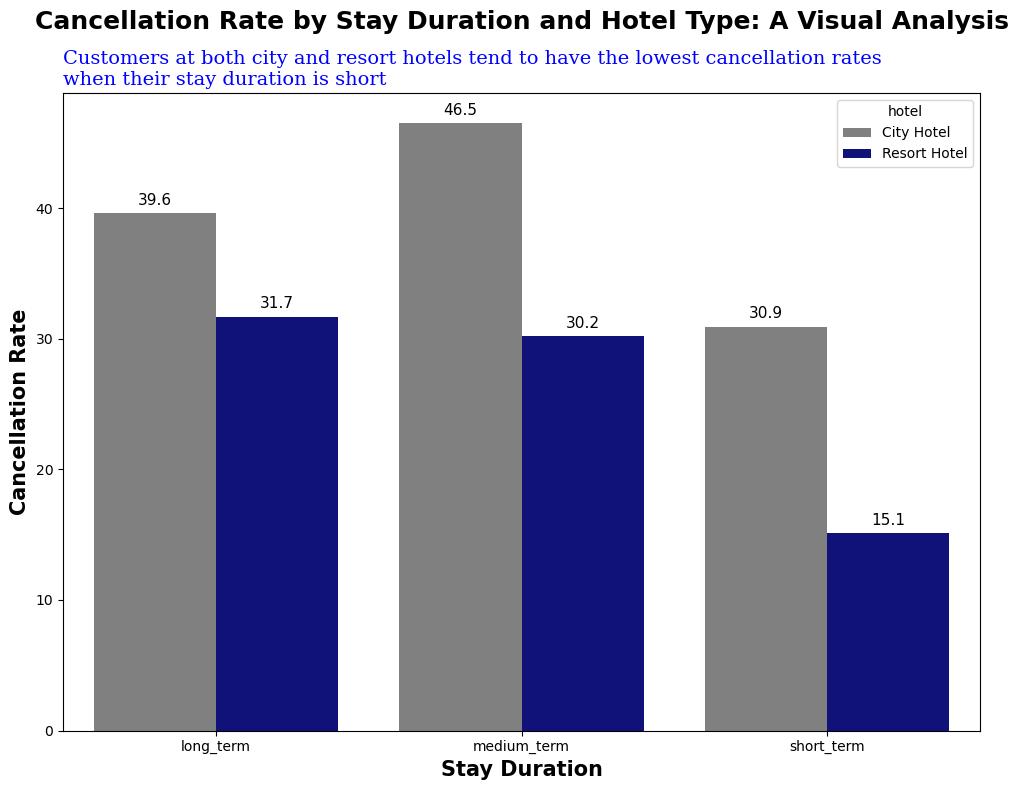

In [ ]:
# Menentukan ukuran gambar
plt.figure(figsize=(10,8))

# Membuat bar plot
sns.barplot(x='thresholds_stay_duration', y='cancellation_rate', hue='hotel', data=df3_pivot, palette=['gray', 'darkblue'])

# Menambahkan label pada sumbu x dan y
plt.xlabel('Stay Duration',fontsize=15, fontweight='bold')
plt.ylabel('Cancellation Rate',fontsize=15, fontweight='bold')

# Memberikan label pada grafik batang
plt.text(x=-0.20, y=40.6, s='39.6', ha='center', va='center', fontsize=11)
plt.text(x=0.20, y=32.7, s='31.7', ha='center', va='center', fontsize=11)
plt.text(x=0.80, y=47.5, s='46.5', ha='center', va='center', fontsize=11)
plt.text(x=1.20, y=31.2, s='30.2', ha='center', va='center', fontsize=11)
plt.text(x=1.80, y=31.9, s='30.9', ha='center', va='center', fontsize=11)
plt.text(x=2.20, y=16.1, s='15.1', ha='center', va='center', fontsize=11)

# Memberikan judul pada grafik
plt.title('Cancellation Rate by Stay Duration and Hotel Type: A Visual Analysis\n\n',fontsize=18, fontweight='bold')
plt.title('Customers at both city and resort hotels tend to have the lowest cancellation rates\nwhen their stay duration is short',
          fontsize=14, family='serif', loc='left', color='blue')

plt.tight_layout()
plt.savefig('cancellation rate of stay duration booking', dpi=200)

### Interpretasi (Hint: Perhatikan pengaruh dari durasi menginap terhadap tingkat pembatalan pemesanan hotel)

- booking city hotel yang memiliki cancellation rate tertinggi adalah kategori medium term dan cancellation rate terendah adalah kategori short term stay duration.
- booking resort hotel yang memiliki cancellation rate tertinggi adalah kategori long term dan cancellation rate terendah adalah kategori short term stay duration.
- durasi menginap kategori long term menunjukkan tingat cancel booking yang tertinggi pada tipe hotel resort.
- durasi menginap kategori medium term menunjukkan tingkat cancel booking yang tertinggi pada tipe hotel city.

## **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

### Membuat kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)


In [ ]:
df4 = ndf3_segment

In [ ]:
df4['lead_time'].describe()

count    118565.000000
mean        104.505832
std         106.915519
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

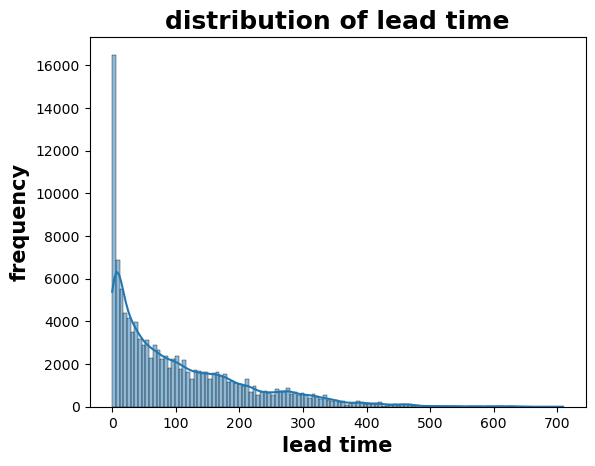

In [ ]:
sns.histplot(data=df4, x='lead_time', kde=True)

# Menambahkan label pada sumbu x dan y
plt.xlabel('lead time', fontsize=15, fontweight='bold')
plt.ylabel('frequency', fontsize=15, fontweight='bold')

# Memberikan label pada grafik batang
plt.title('distribution of lead time', fontsize=18, fontweight='bold')

plt.show()

In [ ]:
# menghitung berapa kali nilai lebih dari 700 muncul dalam kolom
count_of_700 = (df4['lead_time'] >= 700).sum()
count_of_700

1

In [ ]:
# Define the interval bins and text labels
bins = [0, 90, 180, 270, 361, float('inf')]
labels = ['0-3 month', '4-6 months', '7-9 months', '10-12 months', 'more than a year']

# Use pd.cut to create the interval groups with text labels
df4['lead_time_group'] = pd.cut(df4['lead_time'], bins=bins, labels=labels, right=False)

# Display the DataFrame
df4.tail()

C:\Users\Milla\AppData\Local\Temp\ipykernel_10584\1331019288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['lead_time_group'] = pd.cut(df4['lead_time'], bins=bins, labels=labels, right=False)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,thresholds_stay_duration,lead_time_group
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,Personal,96,0,0,Check-Out,2,7,long_term,0-3 month
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,Personal,225,0,2,Check-Out,3,7,long_term,4-6 months
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,Personal,157,0,4,Check-Out,2,7,long_term,0-3 month
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,Personal,104,0,0,Check-Out,2,7,long_term,4-6 months
119389,City Hotel,0,205,2019,October,35,29,2,7,2,...,0,Personal,151,0,2,Check-Out,2,9,long_term,7-9 months


### Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)


In [ ]:
df4_agg = df4.groupby(['hotel', 'is_canceled', 'lead_time_group'])['hotel'].count().reset_index(name='num_bookings')
df4_pivot = df4_agg.pivot_table(index=['hotel', 'lead_time_group'], columns='is_canceled', values='num_bookings').reset_index()

# Mengganti NaN dengan angka 0
df4_pivot.fillna(0, inplace=True)

df4_pivot['cancellation_rate'] = round(df4_pivot[1]*100.0/(df4_pivot[0]+df4_pivot[1]), 1)
df4_pivot['non_cancellation_rate'] = round(df4_pivot[0]*100.0/(df4_pivot[0]+df4_pivot[1]), 1)

df4_pivot

is_canceled,hotel,lead_time_group,0,1,cancellation_rate,non_cancellation_rate
0,City Hotel,0-3 month,30157,13415,30.8,69.2
1,City Hotel,4-6 months,9483,8713,47.9,52.1
2,City Hotel,7-9 months,3976,4345,52.2,47.8
3,City Hotel,10-12 months,1427,4519,76.0,24.0
4,City Hotel,more than a year,790,2074,72.4,27.6
5,Resort Hotel,0-3 month,18876,4793,20.3,79.7
6,Resort Hotel,4-6 months,5135,3073,37.4,62.6
7,Resort Hotel,7-9 months,3028,2158,41.6,58.4
8,Resort Hotel,10-12 months,1183,872,42.4,57.6
9,Resort Hotel,more than a year,334,214,39.1,60.9


### Membuat plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)


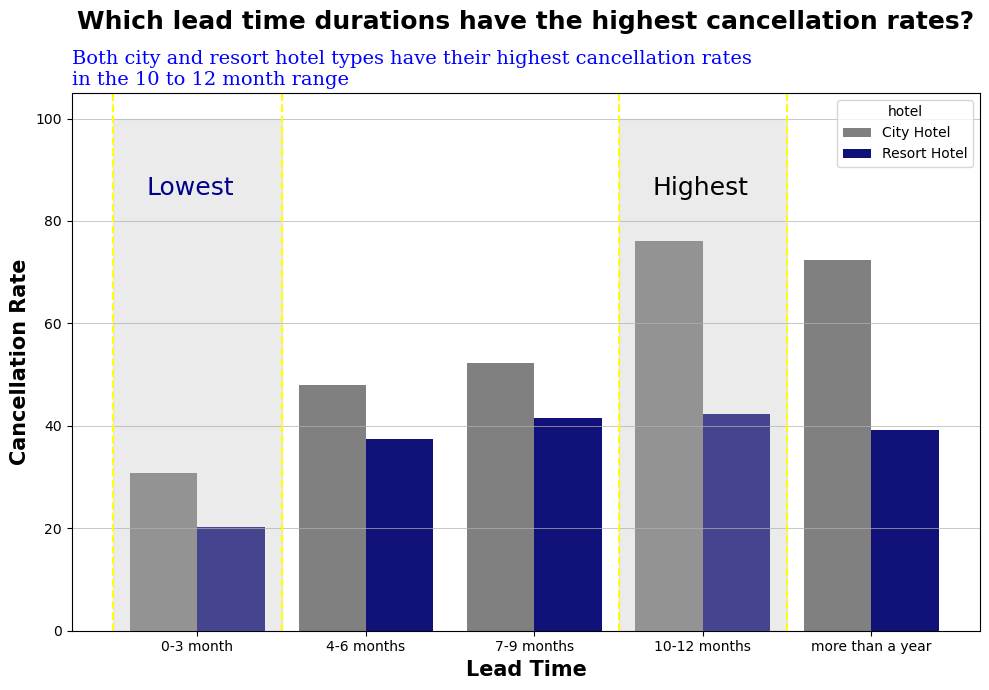

In [ ]:
# Menentukan ukuran gambar
plt.figure(figsize=(10,7))

# Membuat bar plot
sns.barplot(x='lead_time_group', y='cancellation_rate', hue='hotel', data=df4_pivot, palette=['gray', 'darkblue'])

# Menambahkan label pada sumbu x dan y
plt.xlabel('Lead Time',fontsize=15, fontweight='bold')
plt.ylabel('Cancellation Rate',fontsize=15, fontweight='bold')

# Menambahkan kotak dan garis
plt.grid(axis='y', linewidth=0.5)
plt.axvline(-0.5, ls='--', color='yellow')
plt.axvline(0.5, ls='--', color='yellow')
plt.text(x=-0.3, y=85, s='Lowest', fontsize=18, color='darkblue')
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='silver', alpha=0.3)
plt.axvline(2.5, ls='--', color='yellow')
plt.axvline(3.5, ls='--', color='yellow')
plt.text(x=2.7, y=85, s='Highest', fontsize=18, color='black')
plt.stackplot(np.arange(2.5,4.5,1), [[100]], color='silver', alpha=0.3)

# Memberikan judul pada grafik
plt.title('Which lead time durations have the highest cancellation rates?\n\n',fontsize=18, fontweight='bold')
plt.title('Both city and resort hotel types have their highest cancellation rates\nin the 10 to 12 month range',
          fontsize=14, family='serif', loc='left', color='blue')

plt.tight_layout()
plt.savefig('Lead Time Impact on Cancellation Rate', dpi=200)

### Interpretasi (Hint: Perhatikan pengaruh interval waktu)

- lead time pada tipe hotel city dan resort menunjukkan pola cancellation rate yang hampir sama.
- cancellation rate tertinggi terdapat pada lead time bulan 10 sampai 12, baik pada tipe hotel city maupun resort.
- cancellation rate terendah terdapat pada lead time bulan 0 sampai 3, baik pada tipe hotel city maupun resort.